In [158]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [159]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [160]:
data_path = "../mlcourse.ai_Dataset/"
data = pd.read_csv(data_path + 'mlbootcamp5_train.csv')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


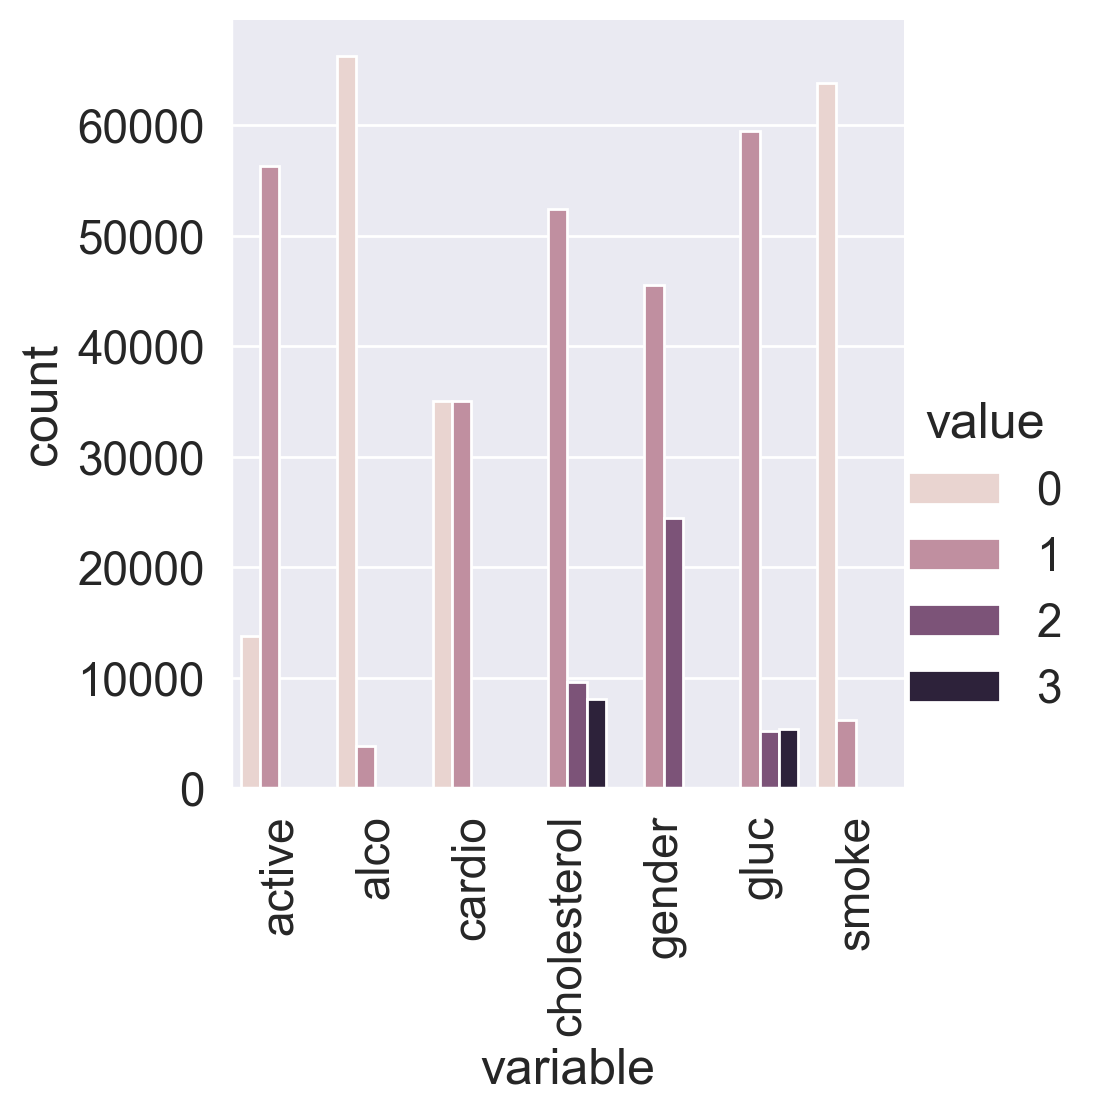

In [162]:
data_uniques = pd.melt(
    frame=data,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)

data_uniques = (
    pd.DataFrame(data_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=data_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'active'),
  Text(1, 0, 'alco'),
  Text(2, 0, 'cholesterol'),
  Text(3, 0, 'gender'),
  Text(4, 0, 'gluc'),
  Text(5, 0, 'smoke')])

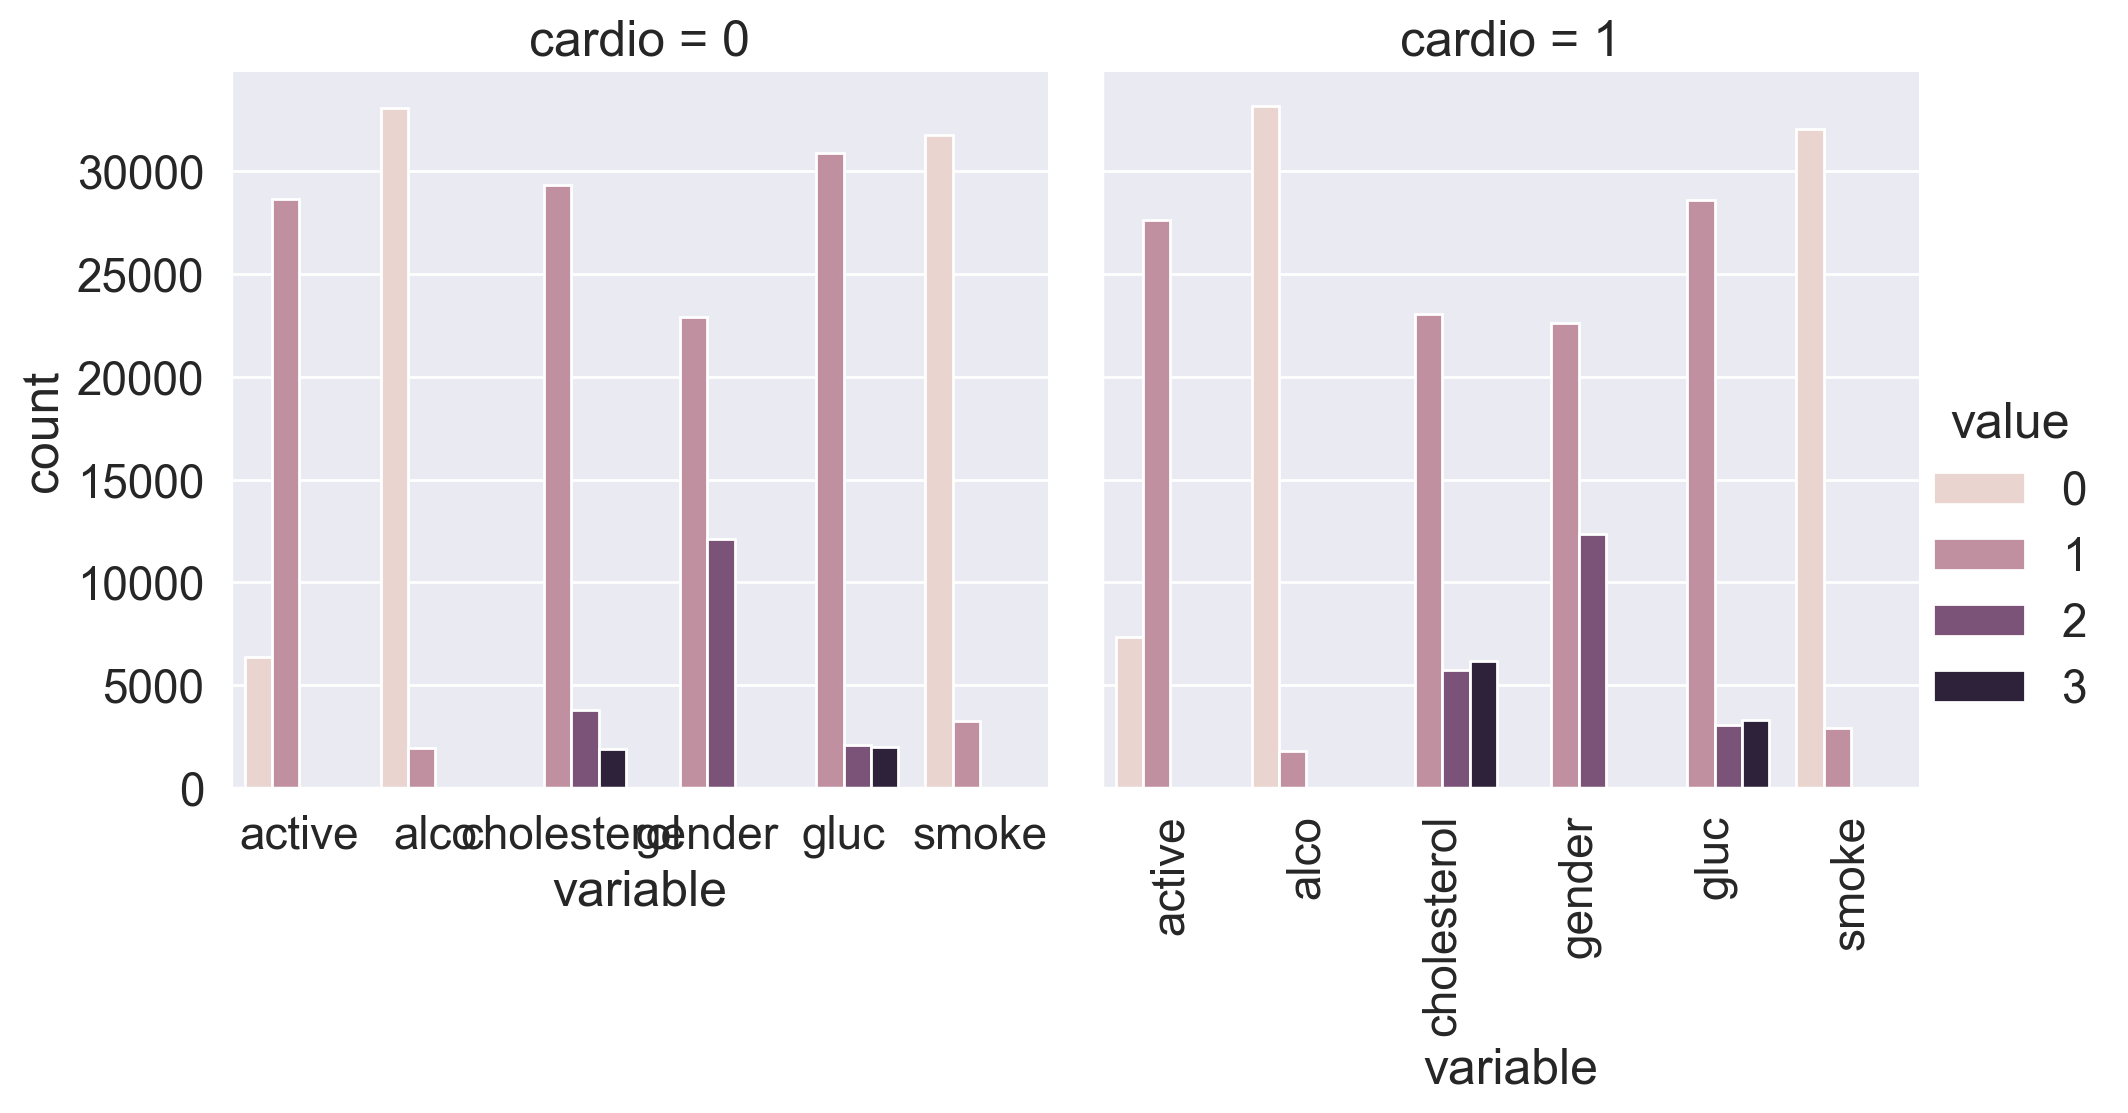

In [163]:
data_uniques = pd.melt(
    frame = data,
    value_vars = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"] ,
    id_vars = ["cardio"],
)

data_uniques = (pd.DataFrame(data_uniques.groupby(["variable", "value", "cardio"])["value"].count())
              .sort_index(level=[0, 1])
              .rename(columns={"value": "count"})
              .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=data_uniques,
    kind="bar",
)
plt.xticks(rotation='vertical')

In [164]:
for c in data.columns:
    n = data[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(data[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


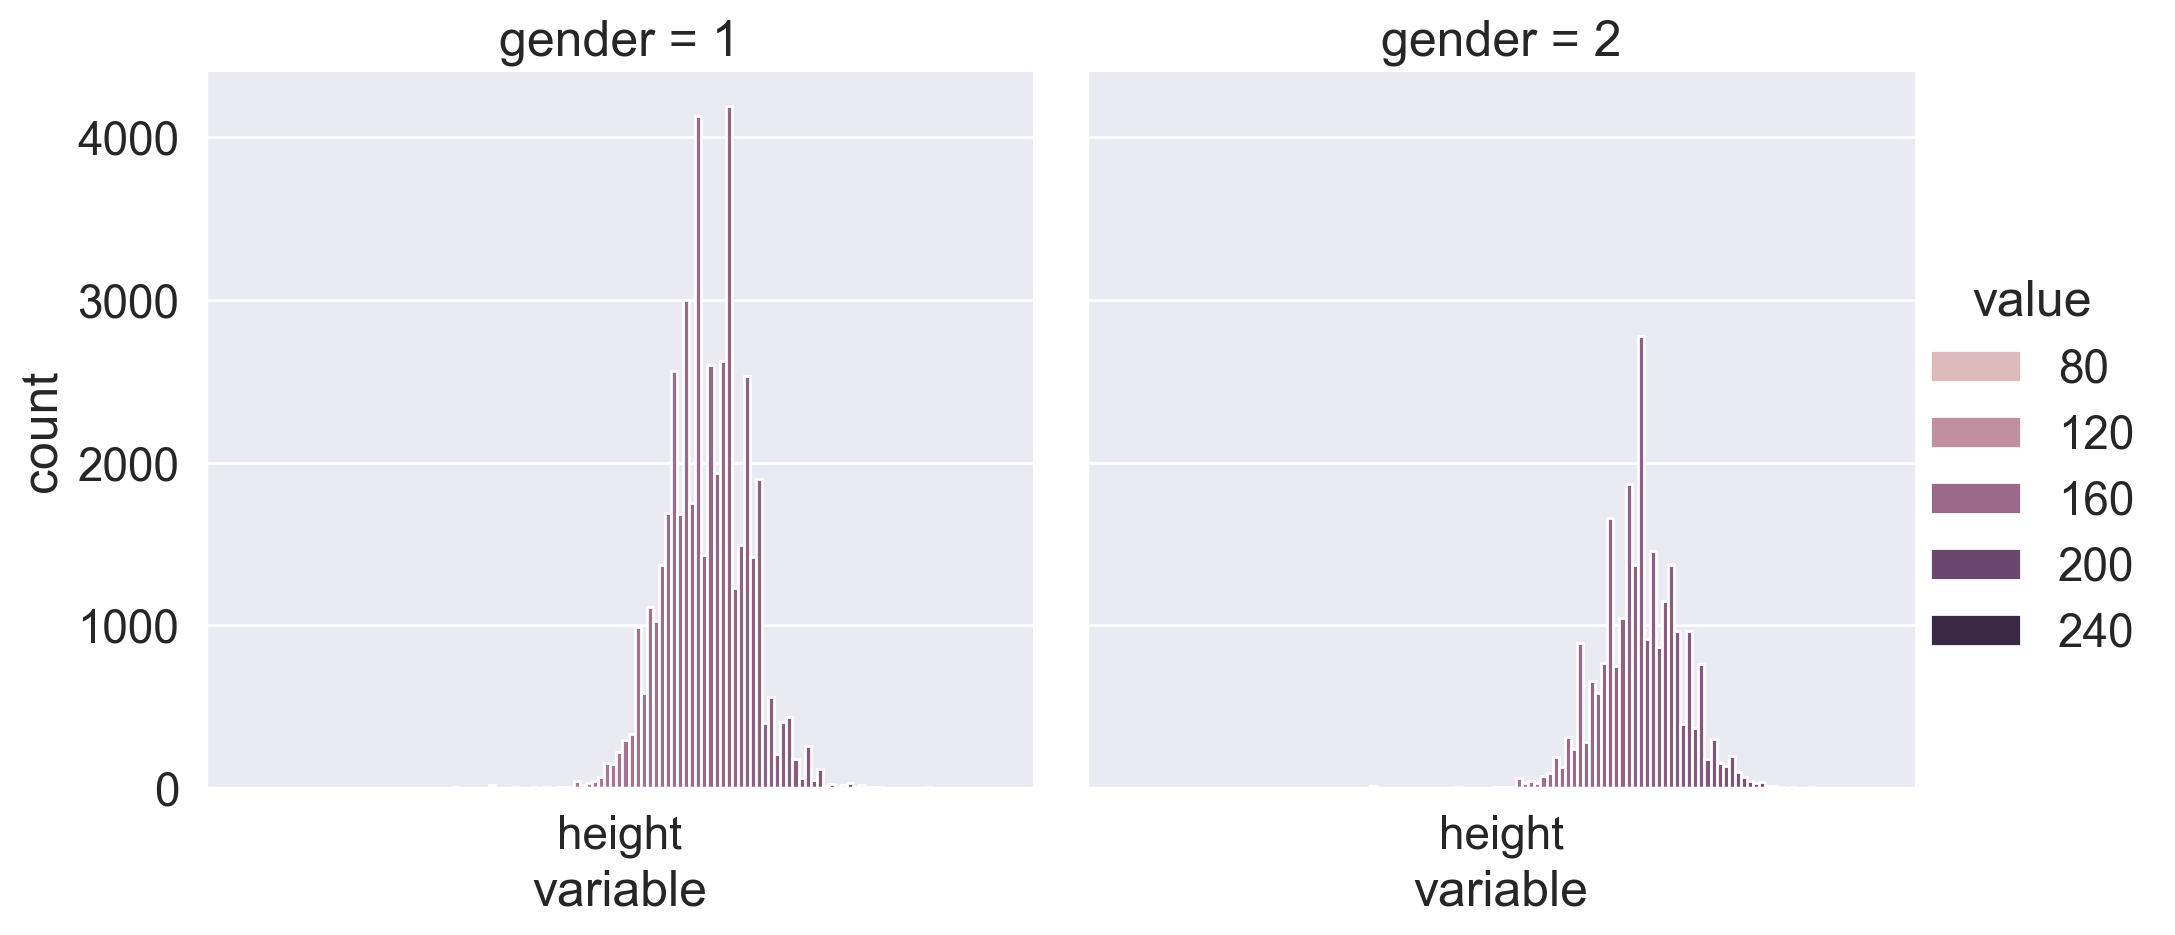

In [165]:
### Task 1.1

gender_height_melt = pd.melt(
    frame = data,
    value_vars=["height"],
    id_vars=["gender"],
)

gender_height_melt = (pd.DataFrame(gender_height_melt.groupby(["variable", "value", "gender"])["value"].count())
              .sort_index(level=[0, 1])
              .rename(columns={"value": "count"})
              .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="gender",
    data=gender_height_melt,
    kind="bar",
)

In [166]:
data.gender.value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [179]:
data.groupby("gender")["height"].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [167]:
data.groupby(['gender', 'alco'])['alco'].count()

gender  alco
1       0       44369
        1        1161
2       0       21867
        1        2603
Name: alco, dtype: int64

Women are prone to use more alco

In [168]:
gender_smokers = data.groupby(['gender', 'smoke'])['smoke'].count()
smokers = data.groupby(['gender'])['gender'].count()
gender_smokers_percentage = gender_smokers.div(smokers, level='gender')*100
print(gender_smokers_percentage)

gender  smoke
1       0        98.214364
        1         1.785636
2       0        78.111974
        1        21.888026
dtype: float64


In [169]:
### Task 1.2

data['age_years'] = round(data.age/365.25).astype(int)
data['age_years'].head()
risk_map = data[(data['age_years']>=60) & (data['age_years']<=65)]

In [170]:
mapper = {1:'4 mmol/l', 2:'5-7 mmol/l', 3: '8 mmol/l'}
# risk_map['cholesterol_remaped'] = risk_map.cholesterol.map(lambda x: mapper[x])

In [171]:
def reduce(data,range):
    pd.cut(data['a'], bins=[0,3,7,11], right=True, labels=False)
    return 

risk_map = risk_map[['cholesterol', 'ap_hi', 'age_years']]
sbp_ranges = [0, 120, 140, 160, 180]

cut_pd = pd.cut(risk_map['ap_hi'], bins=sbp_ranges, right=True, labels=False, include_lowest=False)
cut_pd = cut_pd.fillna(-1)
cut_pd = cut_pd.astype(int)
risk_map['ap_hi_cut'] = cut_pd
risk_map = risk_map[risk_map['ap_hi_cut'] >-1]
# for range in sbp_ranges:
#     risk_map.ap_hi.apply(reduce(range))

# risk_map = risk_map['ap_hi']
pivot_risk_map = pd.pivot_table(risk_map, values='cholesterol', index='age_years', columns='ap_hi_cut', aggfunc='mean')
pivot_risk_map.head(20)

ap_hi_cut,0,1,2,3
age_years,,,,
60,1.302481,1.619155,1.683862,1.641892
61,1.429319,1.687651,1.663265,1.864865
62,1.317619,1.644933,1.588141,1.685039
63,1.421525,1.753086,1.731844,1.725000
64,1.367153,1.664085,1.628319,1.700000
65,1.157895,1.569444,1.365854,1.454545


<Axes: xlabel='ap_hi_cut', ylabel='age_years'>

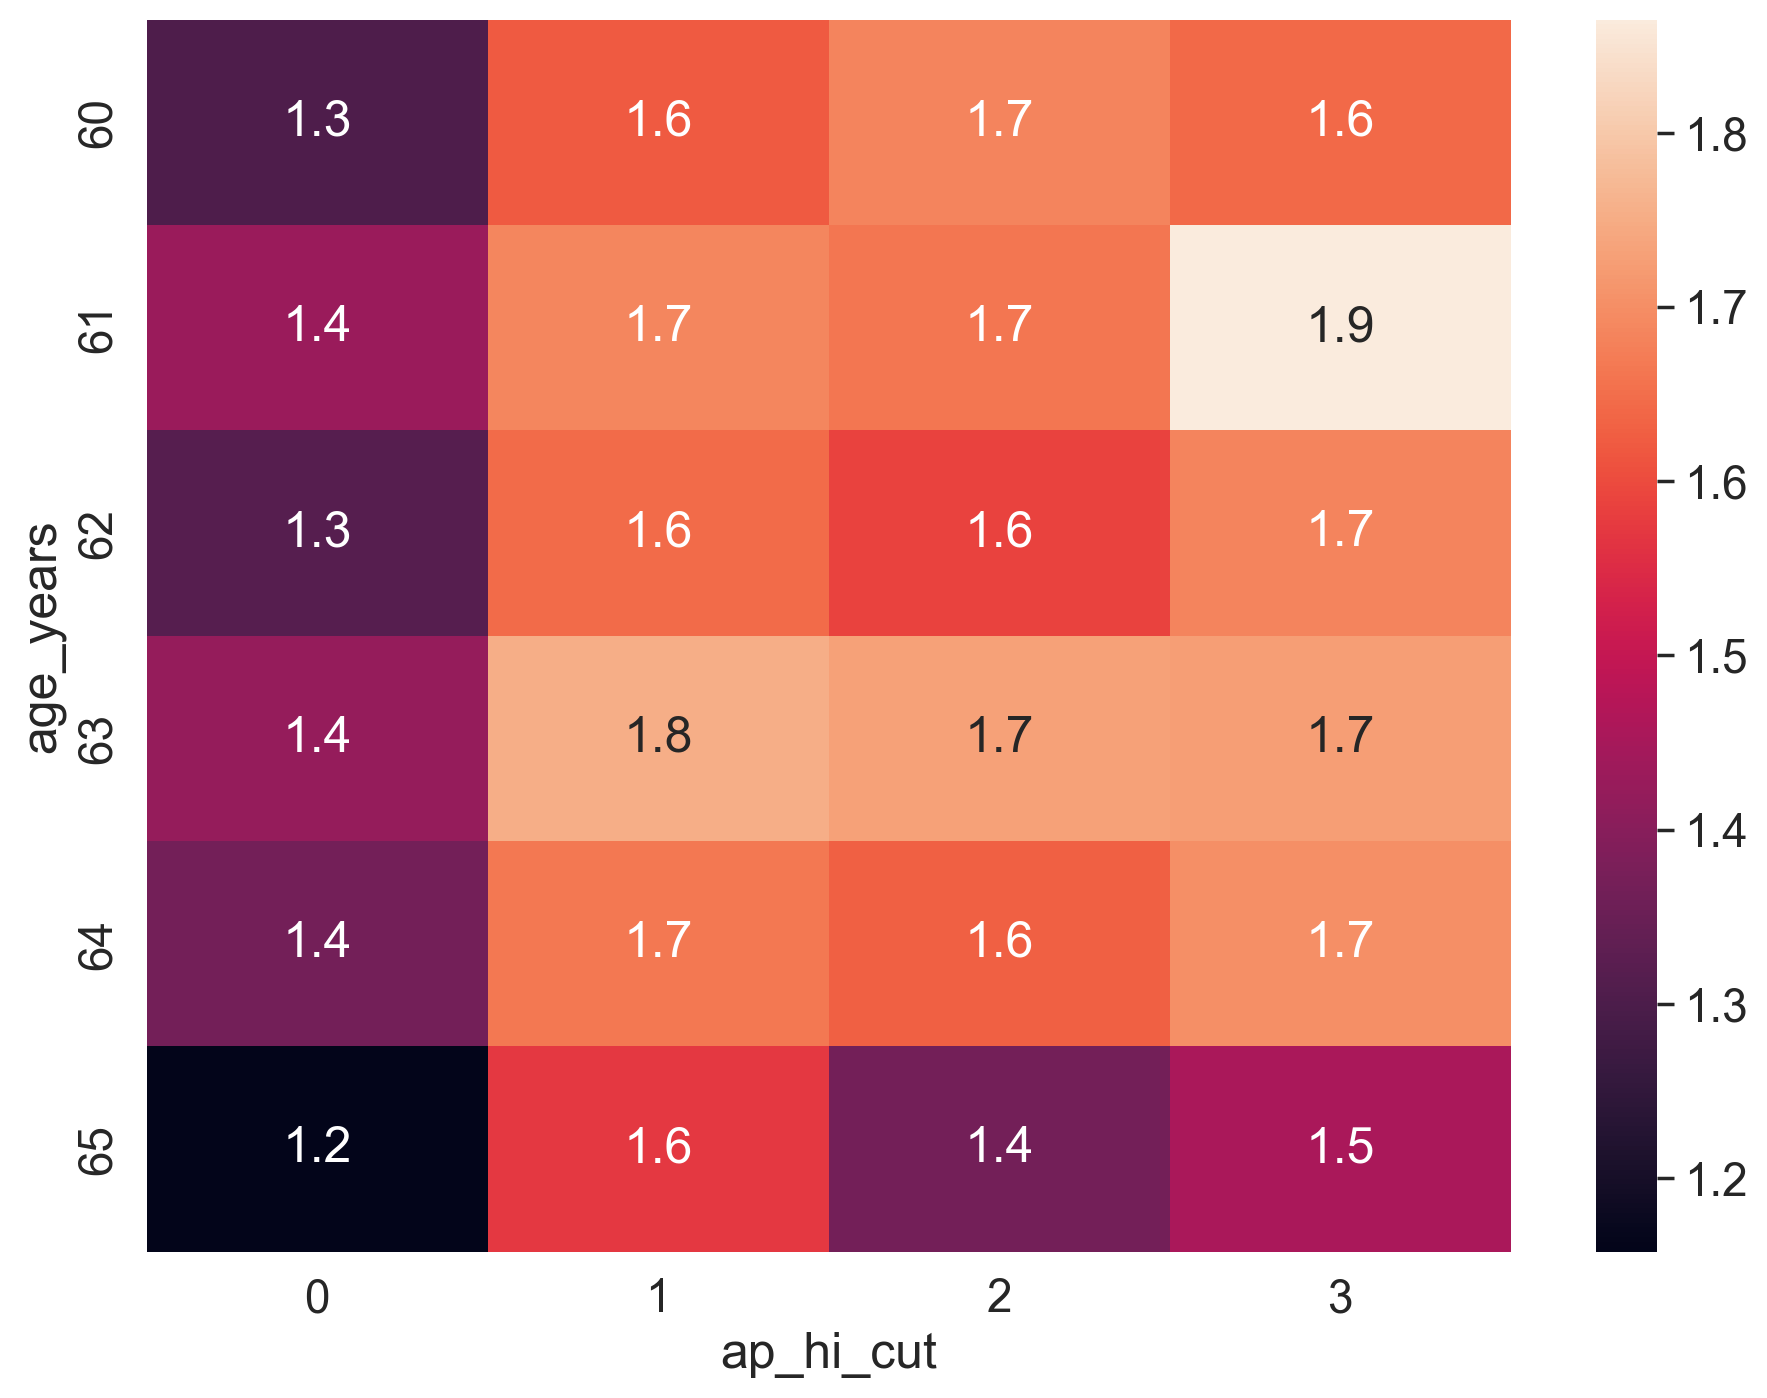

In [172]:
sns.heatmap(pivot_risk_map, annot=True)

In [173]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'age_years'],
      dtype='object')

In [174]:
risk_map = data[(data['age_years']>=60) & (data['age_years']<=65)]
# mapper = {1:'4 mmol/l', 2:'5-7 mmol/l', 3: '8 mmol/l'}
# risk_map['cholesterol_remaped'] = risk_map.cholesterol.map(lambda x: mapper[x])

smoking_old_men = risk_map[
    (risk_map["gender"] == 2)
    & (risk_map["age_years"] >= 60)
    & (risk_map["age_years"] < 65)
    & (risk_map["smoke"] == 1)
]

smoking_old_men[
    (smoking_old_men['cholesterol']==1) 
    & (smoking_old_men['ap_hi'] < 120)]['cardio'].mean()

np.float64(0.2631578947368421)

In [175]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 3)
    & (smoking_old_men["ap_hi"] >= 160)
    & (smoking_old_men["ap_hi"] < 180)
    ]["cardio"].mean()


np.float64(0.8636363636363636)

In [180]:
### Task 1.3

bmi = data.weight/(data.height/100) **2
data['bmi'] = bmi

print(f'Median BMI {bmi.median()}')


bmi_gender = data.groupby('gender')['bmi'].agg('median')
print(f'Gender average BMI: \n {bmi_gender}')

bmi_gender = data.groupby('cardio')['bmi'].agg('median')
print(f'Cardio average BMI: \n {bmi_gender}')

health_non_drink_men = data[
    (data['gender']==2)
    & (data['alco']==0)
    & (data['cardio']==0)
]['bmi'].median()

health_non_drink_women = data[
    (data['gender']==1)
    & (data['alco']==0)
    & (data['cardio']==0)
]['bmi'].median()


print(f'Healthy men {health_non_drink_men}, Healthy women {health_non_drink_women}')

Median BMI 26.374068120774975
Gender average BMI: 
 gender
1    26.709402
2    25.910684
Name: bmi, dtype: float64
Cardio average BMI: 
 cardio
0    25.476660
1    27.471384
Name: bmi, dtype: float64
Healthy men 25.102391333069097, Healthy women 25.654372397382513


In [184]:
filtered_data = data[
    ~(data['ap_lo']>data['ap_hi'])
    & ~(data['height']<data['height'].quantile(0.025))
    & ~(data['height']>data['height'].quantile(0.975))
    & ~(data['weight']<data['weight'].quantile(0.025))
    & ~(data['weight']>data['weight'].quantile(0.975))
]

In [185]:
filtered_data.shape[0]/data.shape[0]

0.9037

<Axes: >

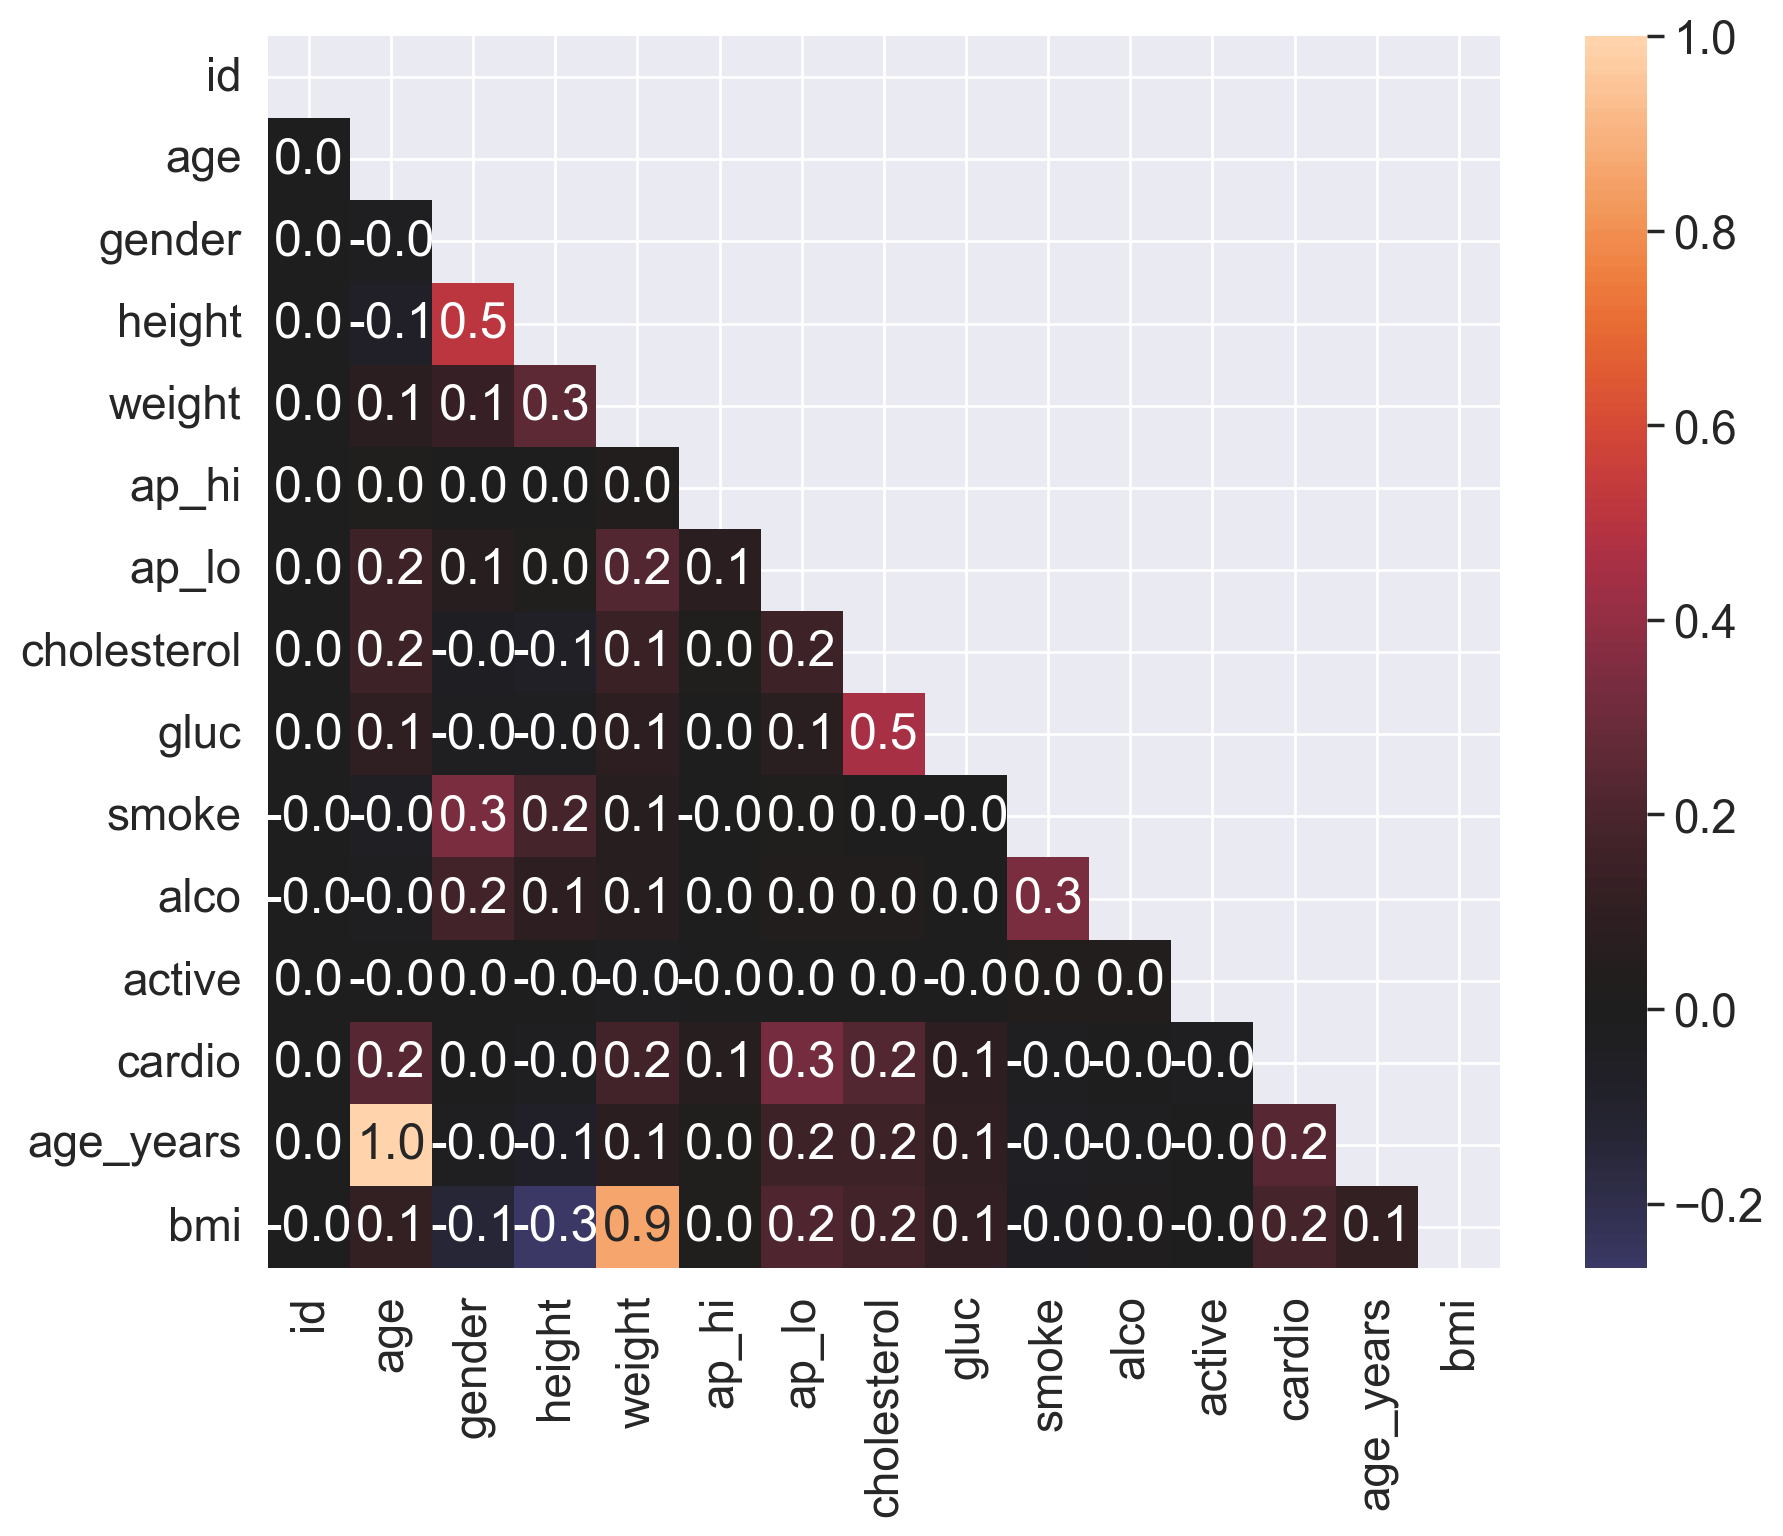

In [191]:
### Task 2.1

corr = filtered_data.corr(method="pearson")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr,
    mask = mask,
    vmax=1,
    center=0,
    annot=True,
    fmt='.1f',
    square=True,
)

<Axes: xlabel='variable', ylabel='value'>

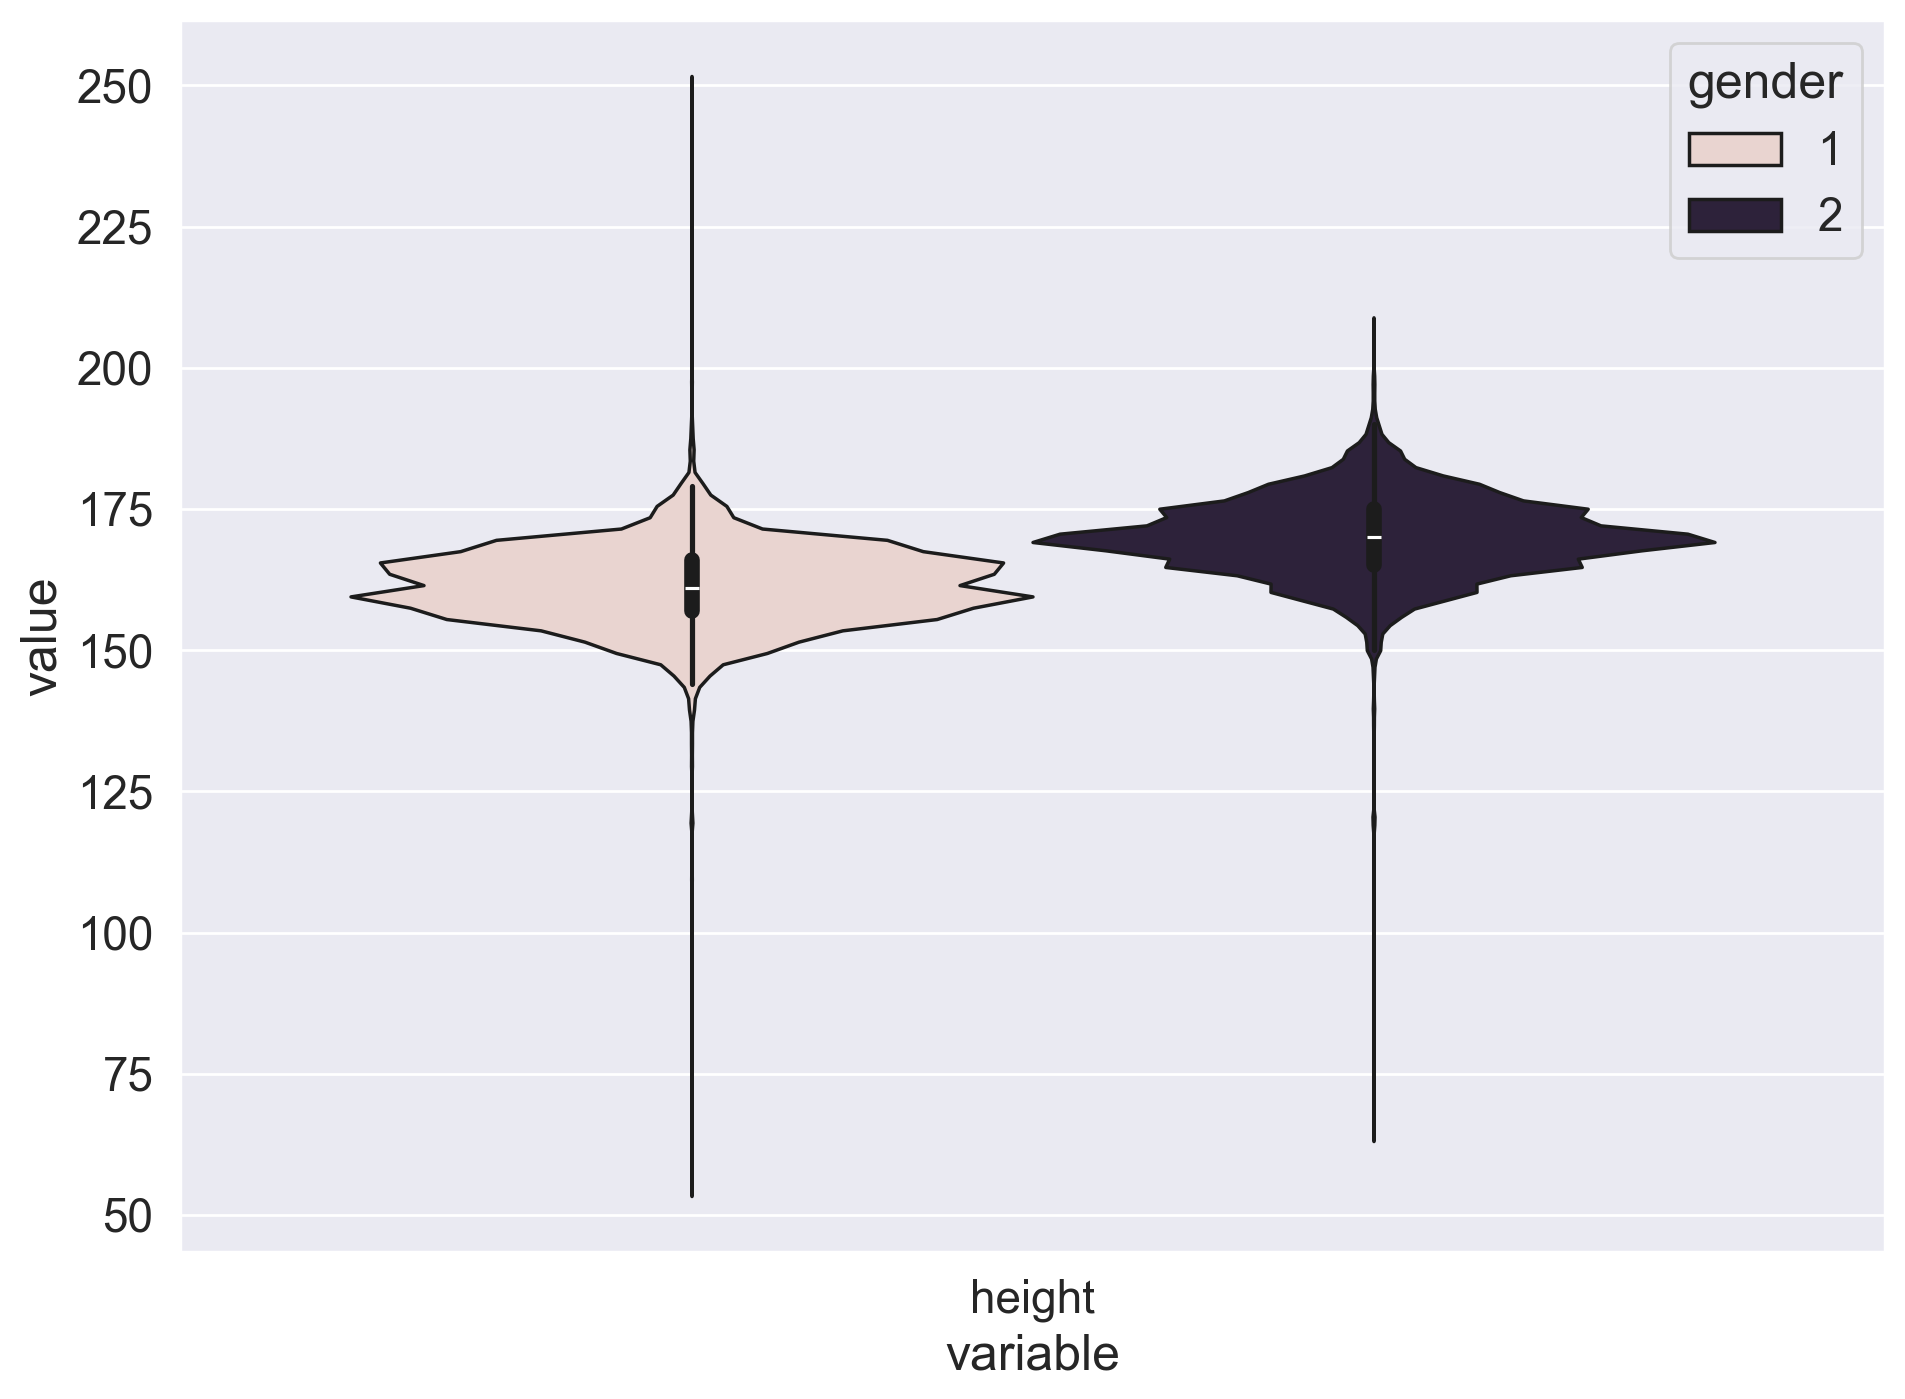

In [195]:
### Task 2.2

melted_gender_height_weight = pd.melt(
    frame=filtered_data,
    id_vars=['gender'],
    value_vars=['height'],
)

# print(melted_gender_height_weight.head())
sns.violinplot(
    data=melted_gender_height_weight,
    x = 'variable',
    y = 'value',
    hue = 'gender',
    scale='count',
    # split=True,
)

<Axes: >

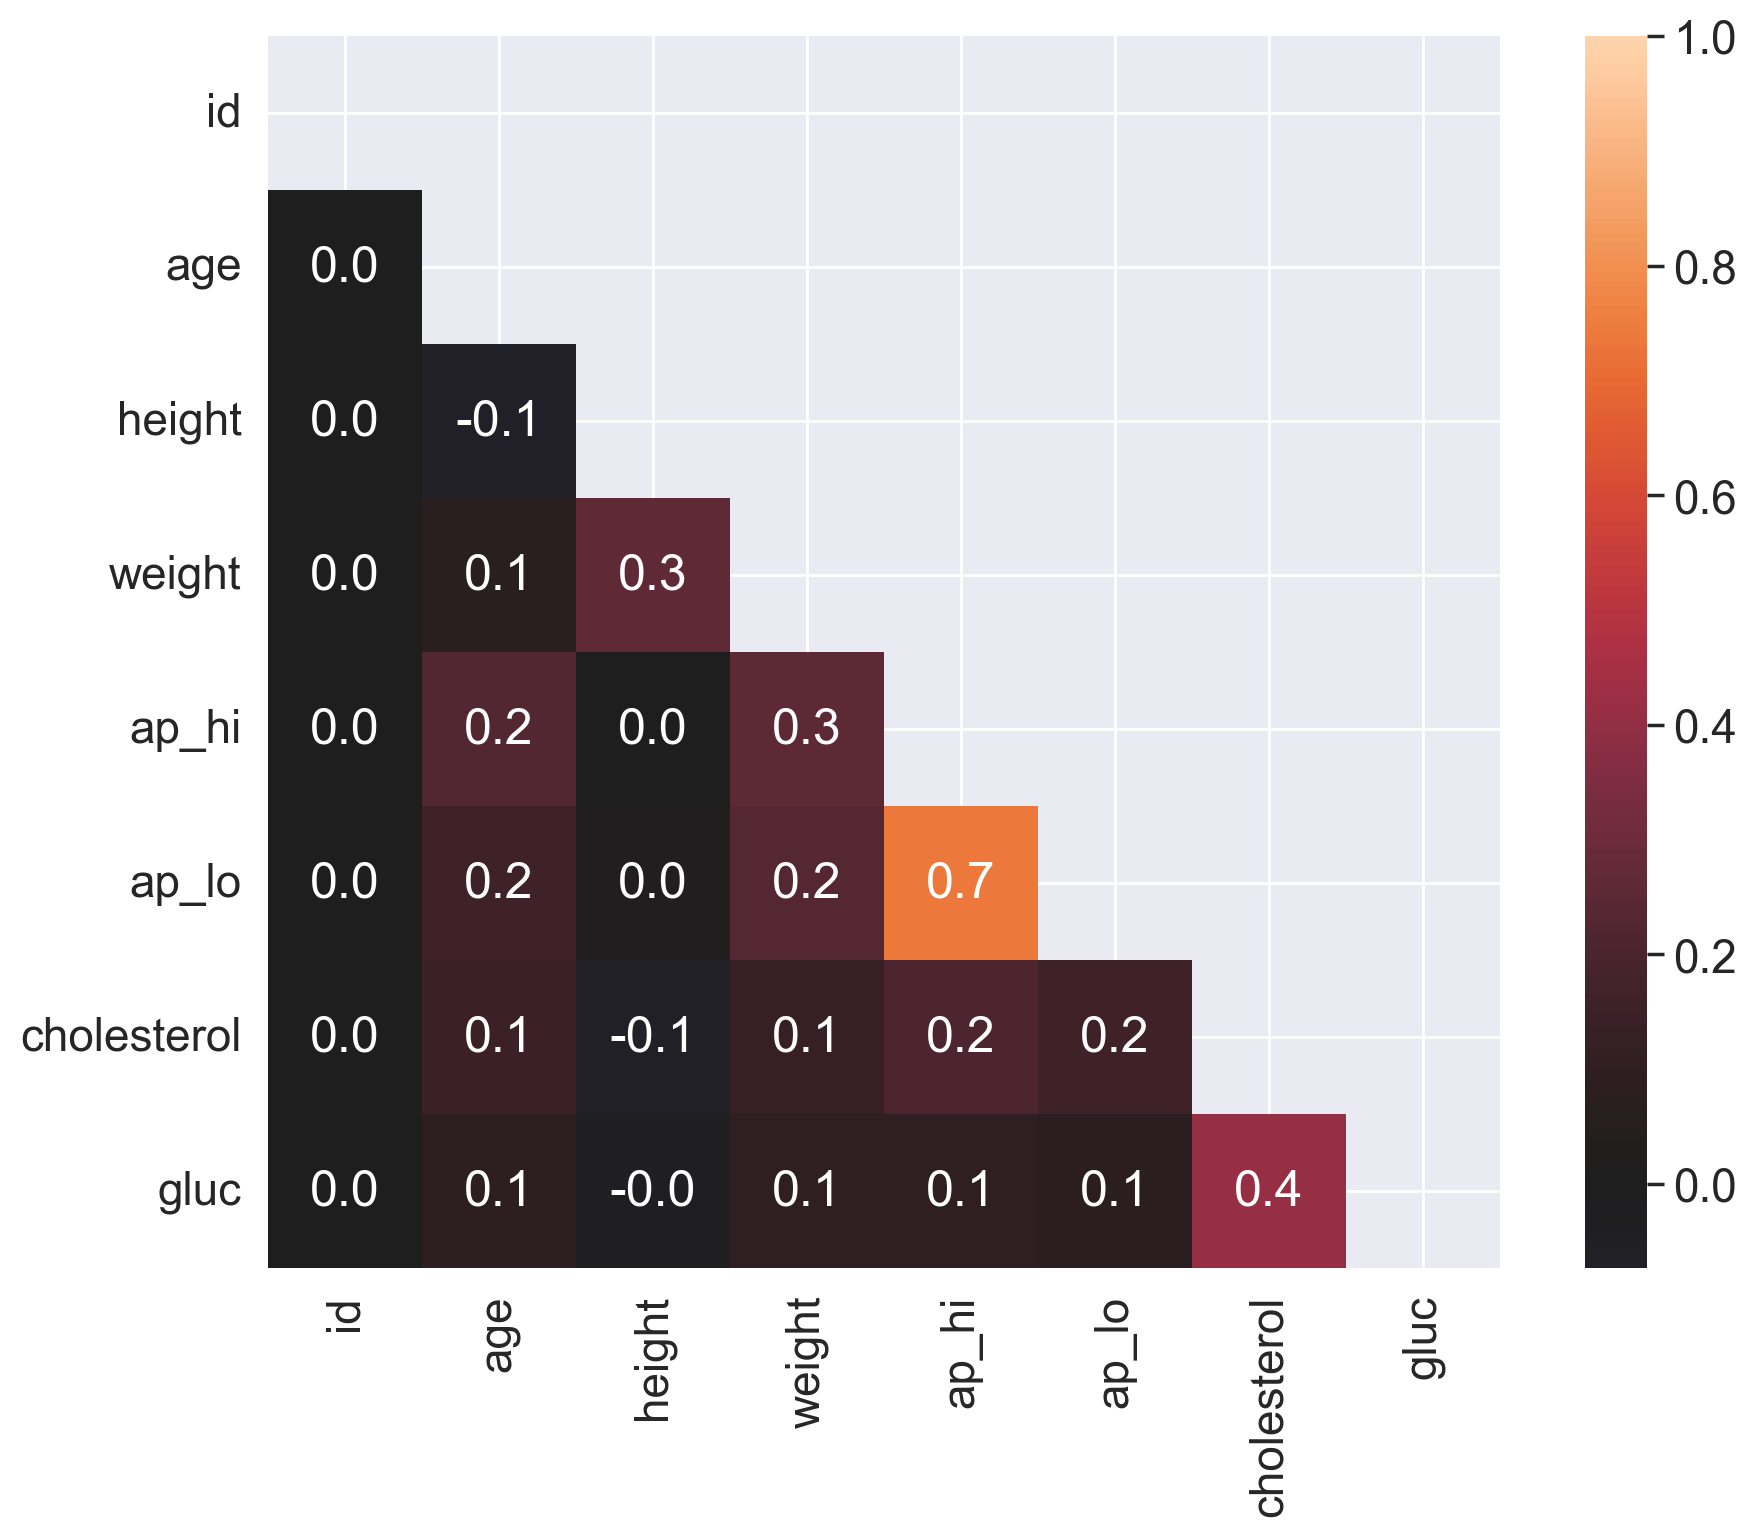

In [199]:
### Task 2.3

corr = filtered_data[
    ["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
].corr(method="spearman")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr,
    mask = mask,
    vmax=1,
    center=0,
    annot=True,
    fmt='.1f',
    square=True,
)

<Axes: xlabel='age_years', ylabel='count'>

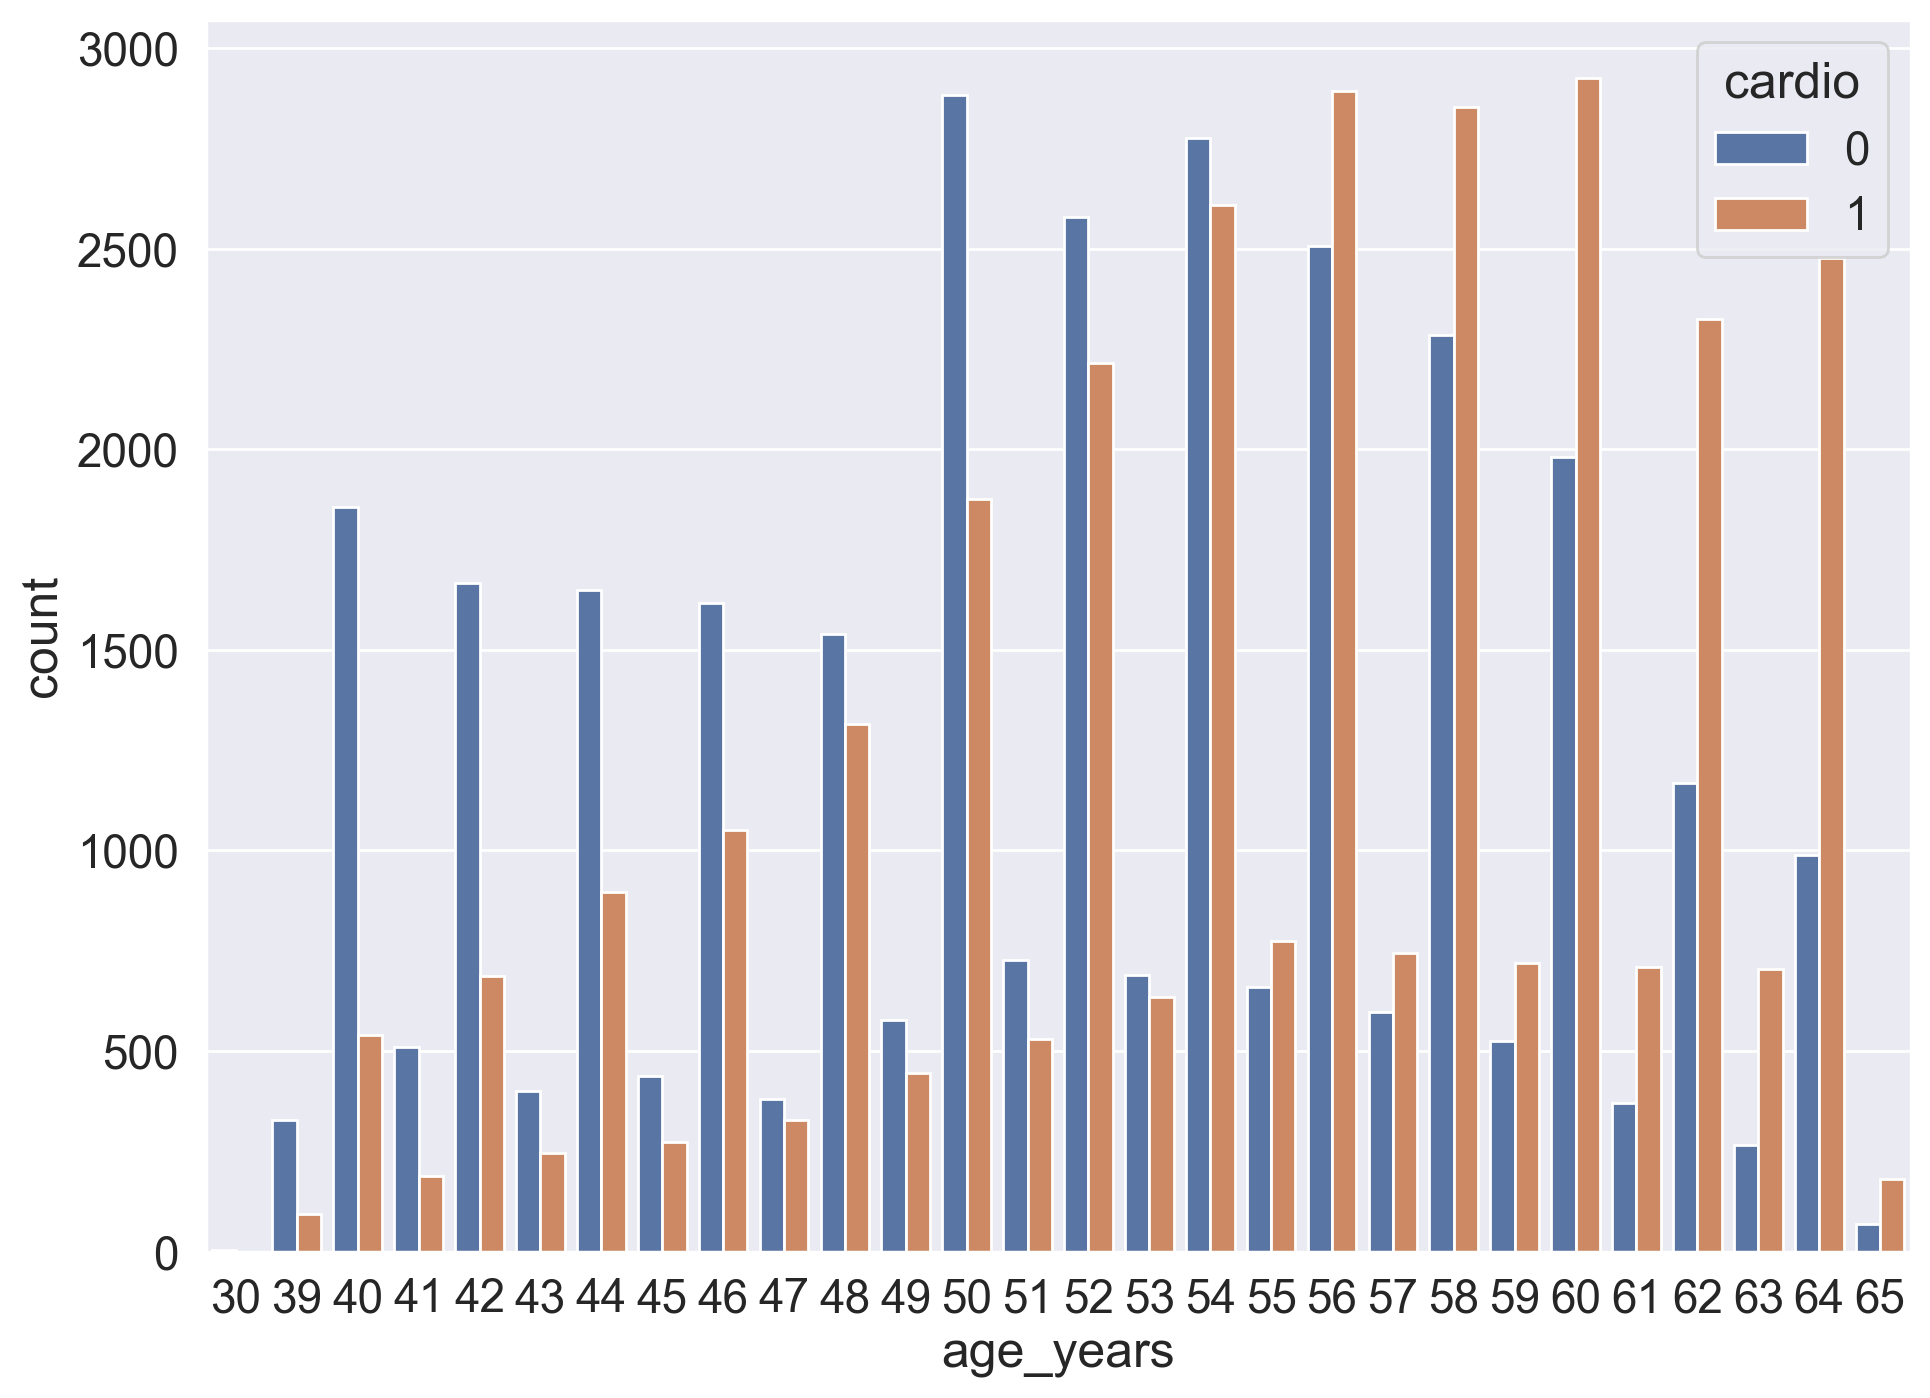

In [200]:
### Task 2.4

sns.countplot(filtered_data, x='age_years', hue='cardio')